In [47]:
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
import seaborn as sns
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import pymysql

import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

import scipy.stats as ss

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('line_65_segments.csv', keep_default_na=True, delimiter=',')


In [3]:
df

,Unnamed: 0,DAYOFSERVICE,TRIPID,LINEID,PROGRNUMBER,STOPPOINTID,DIRECTION,ACTUALTIME_DEP,ACTUALTIME_ARR,hour,...,temp,pressure,humidity,wind_speed,wind_dir,sun,visibility,cloud_height,cloud_cover,holiday
0,0,2018-01-01,5956287,65,2,4521,1,34810,34797,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
1,1,2018-01-01,5956287,65,3,1283,1,34887,34887,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
2,2,2018-01-01,5956287,65,4,4456,1,34926,34926,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
3,3,2018-01-01,5956287,65,5,1284,1,34957,34948,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
4,4,2018-01-01,5956287,65,6,1285,1,35009,35009,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738657,738657,2018-12-31,8590288,65,75,7250,1,23204,23193,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0
738658,738658,2018-12-31,8590288,65,76,7248,1,23349,23349,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0
738659,738659,2018-12-31,8590288,65,77,7207,1,23418,23418,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0
738660,738660,2018-12-31,8590288,65,78,7288,1,23520,23520,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0


In [4]:
segs_to_drop = list((df["segment_id"].value_counts()[df["segment_id"].value_counts() < 100]).index)

df = df.query(f'segment_id not in {segs_to_drop}')
df

,Unnamed: 0,DAYOFSERVICE,TRIPID,LINEID,PROGRNUMBER,STOPPOINTID,DIRECTION,ACTUALTIME_DEP,ACTUALTIME_ARR,hour,...,temp,pressure,humidity,wind_speed,wind_dir,sun,visibility,cloud_height,cloud_cover,holiday
0,0,2018-01-01,5956287,65,2,4521,1,34810,34797,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
1,1,2018-01-01,5956287,65,3,1283,1,34887,34887,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
2,2,2018-01-01,5956287,65,4,4456,1,34926,34926,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
3,3,2018-01-01,5956287,65,5,1284,1,34957,34948,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
4,4,2018-01-01,5956287,65,6,1285,1,35009,35009,9,...,4.6,7.1,7,14,240,0.2,30000,999,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738657,738657,2018-12-31,8590288,65,75,7250,1,23204,23193,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0
738658,738658,2018-12-31,8590288,65,76,7248,1,23349,23349,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0
738659,738659,2018-12-31,8590288,65,77,7207,1,23418,23418,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0
738660,738660,2018-12-31,8590288,65,78,7288,1,23520,23520,6,...,9.3,9.2,9,7,230,0.0,30000,25,7,0


In [5]:
# drop unrelated columns
df = df.drop(columns=['Unnamed: 0',"TRIPID", "LINEID", "STOPPOINTID"])
df["DIRECTION"] = df["DIRECTION"].astype('category')

In [6]:
df.nunique()

DAYOFSERVICE          360
PROGRNUMBER            87
DIRECTION               2
ACTUALTIME_DEP      66252
ACTUALTIME_ARR      66266
hour                   22
dayofweek               2
journey_time         1788
dwell_time            433
prev_stop_id          184
prev_progrnumber       87
prev_dept_time      66096
segment_id            187
rain                   43
temp                  294
pressure              173
humidity               19
wind_speed             34
wind_dir               36
sun                    11
visibility             55
cloud_height           73
cloud_cover             9
holiday                 3
dtype: int64

In [7]:
#check if any null column
df.isnull().sum()

DAYOFSERVICE        0
PROGRNUMBER         0
DIRECTION           0
ACTUALTIME_DEP      0
ACTUALTIME_ARR      0
hour                0
dayofweek           0
journey_time        0
dwell_time          0
prev_stop_id        0
prev_progrnumber    0
prev_dept_time      0
segment_id          0
rain                0
temp                0
pressure            0
humidity            0
wind_speed          0
wind_dir            0
sun                 0
visibility          0
cloud_height        0
cloud_cover         0
holiday             0
dtype: int64

In [8]:
df.dtypes

DAYOFSERVICE          object
PROGRNUMBER            int64
DIRECTION           category
ACTUALTIME_DEP         int64
ACTUALTIME_ARR         int64
hour                   int64
dayofweek              int64
journey_time           int64
dwell_time             int64
prev_stop_id           int64
prev_progrnumber       int64
prev_dept_time         int64
segment_id            object
rain                 float64
temp                 float64
pressure             float64
humidity               int64
wind_speed             int64
wind_dir               int64
sun                  float64
visibility             int64
cloud_height           int64
cloud_cover            int64
holiday                int64
dtype: object

In [9]:
#change datatypes of some features
df['DAYOFSERVICE'] = df['DAYOFSERVICE'].astype('datetime64') #convert DAYOFSERVICE to datetime
df['DAYOFSERVICE']=df['DAYOFSERVICE'].apply(lambda x: x.toordinal()) #then convert it to numeric
df['dayofweek'] = df['dayofweek'].astype('category')
df['hour'] = df['hour'].astype('category')
df.dtypes


DAYOFSERVICE           int64
PROGRNUMBER            int64
DIRECTION           category
ACTUALTIME_DEP         int64
ACTUALTIME_ARR         int64
hour                category
dayofweek           category
journey_time           int64
dwell_time             int64
prev_stop_id           int64
prev_progrnumber       int64
prev_dept_time         int64
segment_id            object
rain                 float64
temp                 float64
pressure             float64
humidity               int64
wind_speed             int64
wind_dir               int64
sun                  float64
visibility             int64
cloud_height           int64
cloud_cover            int64
holiday                int64
dtype: object

In [10]:
y = pd.DataFrame(df["journey_time"])
X = df.drop(["journey_time"],1)

In [11]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  738338
training range (70%):	 rows 0 to 516836
test range (30%): 	 rows 516836 to 738338


In [12]:
continuous_columns = X.select_dtypes(['int64','float64']).columns
X[continuous_columns].dtypes

DAYOFSERVICE          int64
PROGRNUMBER           int64
ACTUALTIME_DEP        int64
ACTUALTIME_ARR        int64
dwell_time            int64
prev_stop_id          int64
prev_progrnumber      int64
prev_dept_time        int64
rain                float64
temp                float64
pressure            float64
humidity              int64
wind_speed            int64
wind_dir              int64
sun                 float64
visibility            int64
cloud_height          int64
cloud_cover           int64
holiday               int64
dtype: object

In [13]:
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].dtypes

DIRECTION    category
hour         category
dayofweek    category
dtype: object

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

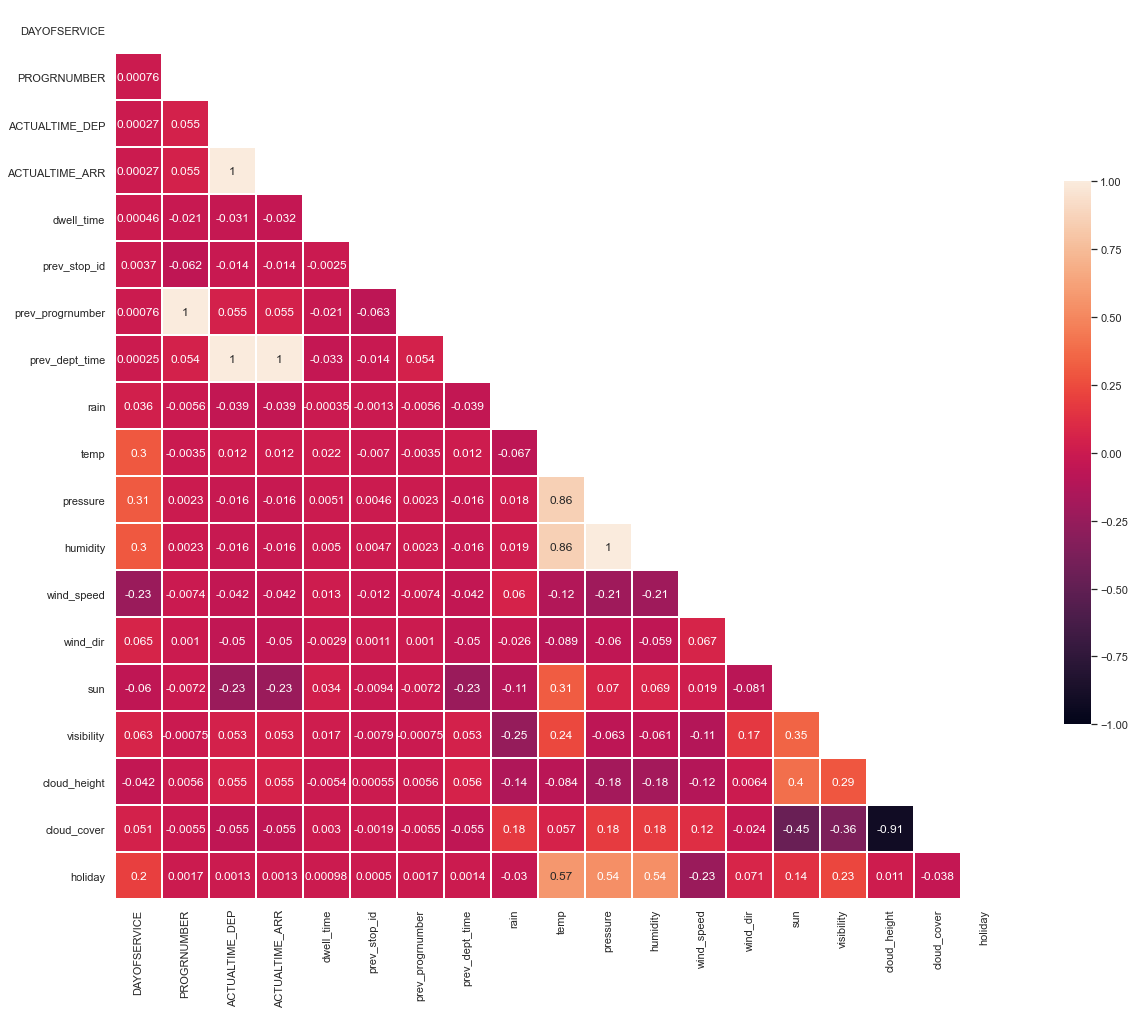

In [14]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

,journey_time
PROGRNUMBER,0.071907
prev_progrnumber,0.071873
dwell_time,0.069163
prev_stop_id,0.023167
sun,0.018336
wind_speed,0.013663
visibility,0.007556
temp,0.005865
cloud_cover,0.004745
rain,0.004101


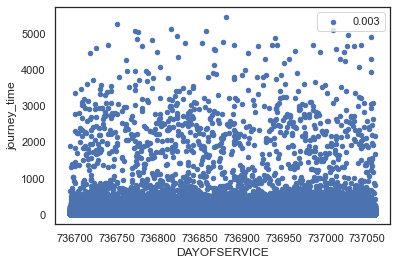

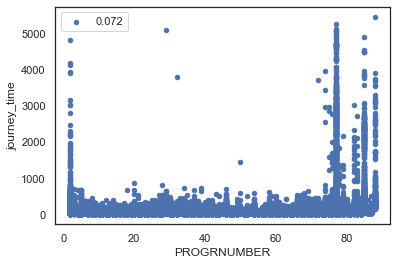

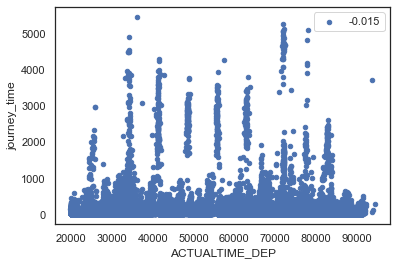

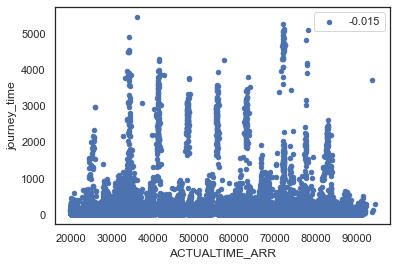

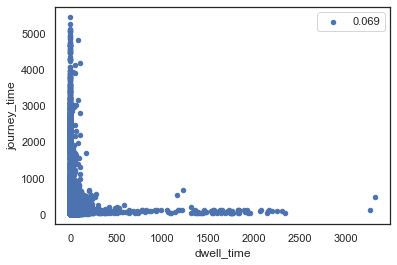

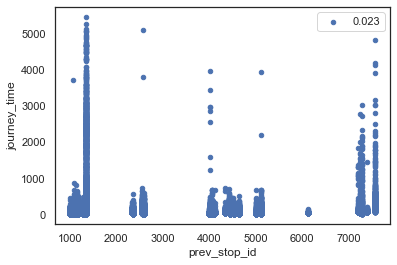

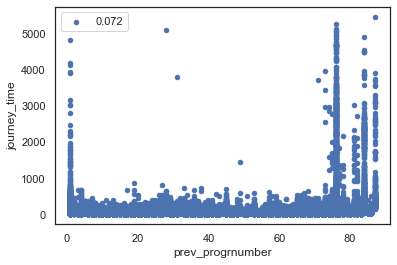

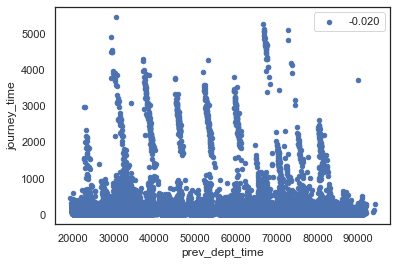

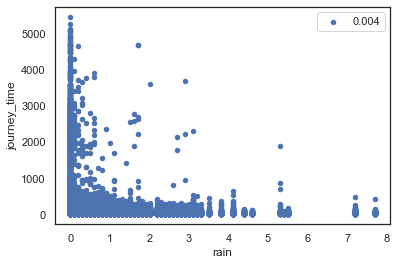

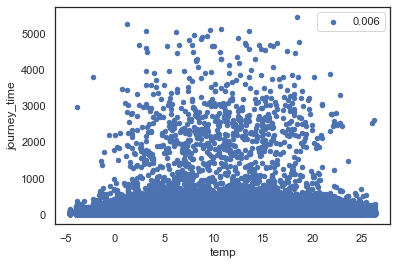

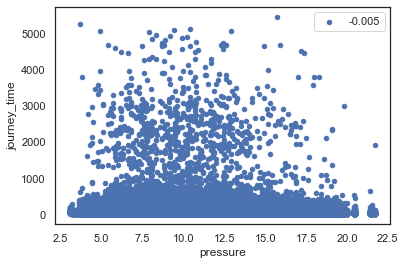

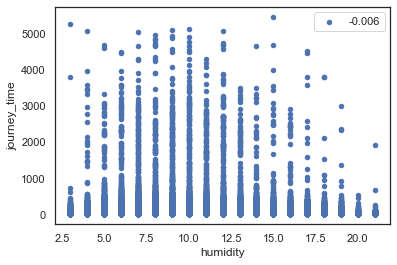

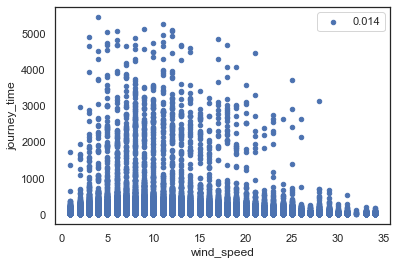

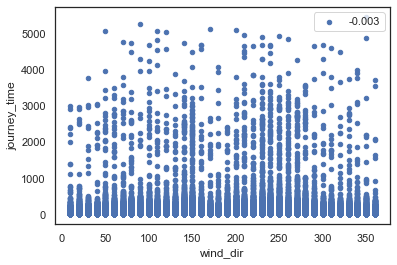

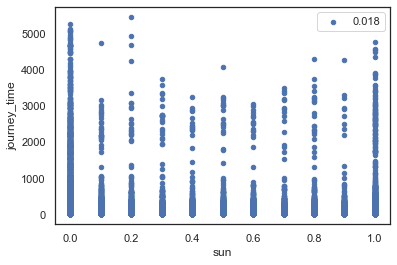

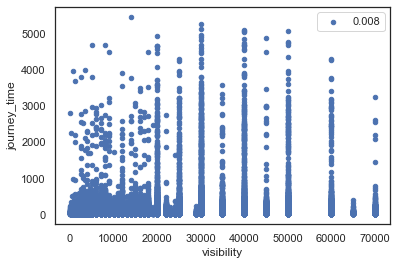

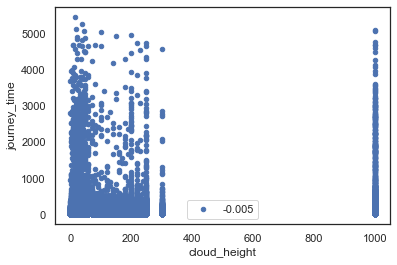

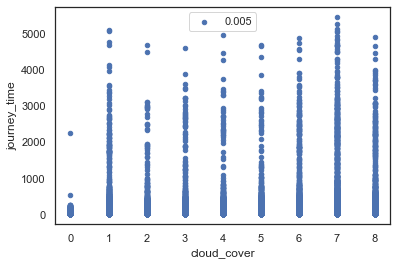

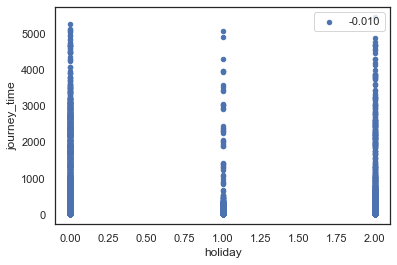

In [15]:
# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all continuous features and target
for column in X_train[continuous_columns]:
    # create temp df to merge column and target
    df_temp = pd.concat([X_train[column], y_train], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, "journey_time"]].corr().values[0,1]
    # plot the column and tartget feature
    df_temp.plot(kind='scatter', x=column, y="journey_time", label="%.3f" % correlation)
    # add correlation to dict
    corr_dict[column] = correlation

# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['journey_time']).sort_values('journey_time', ascending=False)
corr_df

In [16]:
low_information_gain = ['rain',
                        'wind_dir',
                        'cloud_cover',
                        'wind_speed',
                        'pressure',
                        'humidity',
                        'sun',
                        "PROGRNUMBER",
                        "ACTUALTIME_DEP",
                        "ACTUALTIME_ARR",
                        "dwell_time",
                        "prev_stop_id",
                        "prev_progrnumber",
                        "DAYOFSERVICE",
                        "DIRECTION"]

<Figure size 432x288 with 0 Axes>

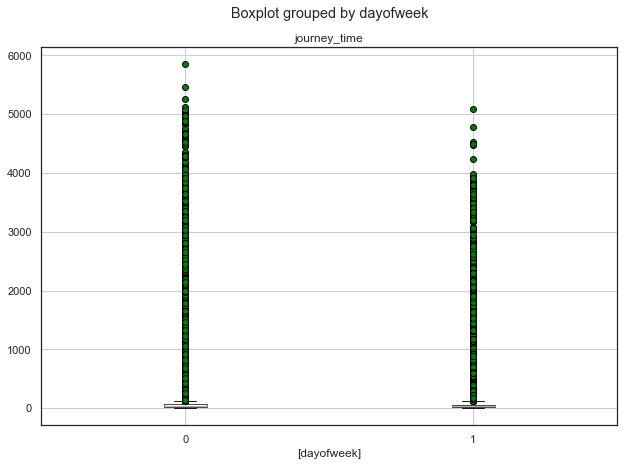

In [17]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['journey_time'], by=['dayofweek'], flierprops=flierprops, figsize=(10,7))

<Figure size 432x288 with 0 Axes>

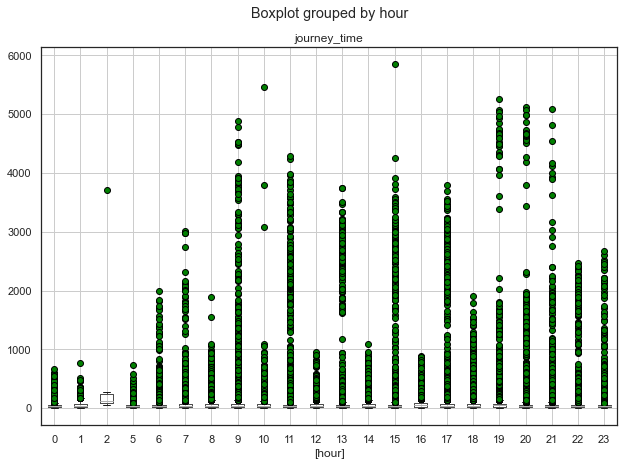

In [18]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['journey_time'], by=['hour'], flierprops=flierprops, figsize=(10,7))

### First attempt using one-hot encoding for the segment IDs
This results in a very large number of columns

In [19]:
# drop the useless column
df_rev1 = df.copy()
# drop low value features
df_rev1.drop(low_information_gain, 1, inplace=True)

In [20]:
df_rev1 = pd.get_dummies(df_rev1)
df_rev1.dtypes

journey_time              int64
prev_dept_time            int64
temp                    float64
visibility                int64
cloud_height              int64
                         ...   
segment_id_7287-7208      uint8
segment_id_7288-7286      uint8
segment_id_7289-7280      uint8
segment_id_7395-6124      uint8
segment_id_7564-4521      uint8
Length: 217, dtype: object

In [21]:
# y is the target
y = df_rev1["journey_time"]
# X is everything else
X = df_rev1.drop(["journey_time"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_rev1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  738338
training range (70%):	 rows 0 to 516836
test range (30%): 	 rows 516836 to 738338


In [22]:
print("\nDescriptive features in X:\n", X_train.head(5))
print("\nTarget feature in y:\n", y_train.head(5))


Descriptive features in X:
         prev_dept_time  temp  visibility  cloud_height  holiday  hour_0  \
317295           28917  16.7       25000           160        0       0   
611037           71447   4.7       30000           999        0       0   
351767           22022  10.9       40000           200        2       0   
679835           62176   8.3       30000           200        0       0   
520073           26834   9.9       40000            50        2       0   

        hour_1  hour_2  hour_5  hour_6  ...  segment_id_7281-7284  \
317295       0       0       0       0  ...                     0   
611037       0       0       0       0  ...                     0   
351767       0       0       0       1  ...                     0   
679835       0       0       0       0  ...                     0   
520073       0       0       0       0  ...                     0   

        segment_id_7282-7278  segment_id_7283-7282  segment_id_7284-7287  \
317295                     0 

In [23]:
X_train.head(5)

,prev_dept_time,temp,visibility,cloud_height,holiday,hour_0,hour_1,hour_2,hour_5,hour_6,...,segment_id_7281-7284,segment_id_7282-7278,segment_id_7283-7282,segment_id_7284-7287,segment_id_7286-7283,segment_id_7287-7208,segment_id_7288-7286,segment_id_7289-7280,segment_id_7395-6124,segment_id_7564-4521
317295,28917,16.7,25000,160,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611037,71447,4.7,30000,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351767,22022,10.9,40000,200,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
679835,62176,8.3,30000,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520073,26834,9.9,40000,50,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,prev_dept_time,temp,visibility,cloud_height,holiday,hour_0,hour_1,hour_2,hour_5,hour_6,...,segment_id_7281-7284,segment_id_7282-7278,segment_id_7283-7282,segment_id_7284-7287,segment_id_7286-7283,segment_id_7287-7208,segment_id_7288-7286,segment_id_7289-7280,segment_id_7395-6124,segment_id_7564-4521
0,28917,16.7,25000,160,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,71447,4.7,30000,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22022,10.9,40000,200,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62176,8.3,30000,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26834,9.9,40000,50,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

In [26]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_linreg.coef_)))


Features are: 
 Index(['prev_dept_time', 'temp', 'visibility', 'cloud_height', 'holiday',
       'hour_0', 'hour_1', 'hour_2', 'hour_5', 'hour_6',
       ...
       'segment_id_7281-7284', 'segment_id_7282-7278', 'segment_id_7283-7282',
       'segment_id_7284-7287', 'segment_id_7286-7283', 'segment_id_7287-7208',
       'segment_id_7288-7286', 'segment_id_7289-7280', 'segment_id_7395-6124',
       'segment_id_7564-4521'],
      dtype='object', length=216)

Coeficients are: 
 [-1.04775881e-02 -7.40390885e-02 -1.54379158e-05  1.93119133e-04
 -7.33013535e-01 -5.88027769e+07 -5.88028037e+07 -5.88019501e+07
 -5.88034918e+07 -5.88034512e+07 -5.88034083e+07 -5.88033643e+07
 -5.88033224e+07 -5.88033002e+07 -5.88032307e+07 -5.88032204e+07
 -5.88031545e+07 -5.88031433e+07 -5.88030796e+07 -5.88030609e+07
 -5.88030090e+07 -5.88029849e+07 -5.88029521e+07 -5.88029151e+07
 -5.88028871e+07 -5.88028503e+07 -5.88028093e+07 -1.38382973e+07
 -1.38383020e+07 -2.23738051e+06 -2.23739705e+06 -2.23740797e+0

In [27]:
multiple_linreg_predictions_train = multiple_linreg.predict(X_train)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    journey_time   Predicted
0             26   50.052948
1             49   46.865139
2             44   49.680665
3            101  109.558798
4             28   20.040473
..           ...         ...
95            46   42.077727
96            17   27.345442
97            74   56.015907
98           173  167.837516
99            53   78.855605

[100 rows x 2 columns]


In [28]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [29]:
printMetrics(y_train, multiple_linreg_predictions_train)


MAE:  20.292755706207814
RMSE:  81.62925034114578
R2:  0.4216498683447427


In [30]:
multiple_linreg_predictions_train = multiple_linreg.predict(X_test)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    journey_time  Predicted
0             14  27.963425
1             61  85.687582
2             29  37.532227
3             52  55.494891
4             16   7.892402
..           ...        ...
95           228  84.242974
96            19  21.304788
97            24  34.654934
98            85  85.539886
99            30  27.347118

[100 rows x 2 columns]


In [31]:
printMetrics(y_test, multiple_linreg_predictions_train)


MAE:  20.230732435161976
RMSE:  80.55470714967389
R2:  0.43212110335706067


In [32]:
scores = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error', cv=5)
scores

array([2.08406399e+01, 3.41839365e+04, 1.93289472e+01, 1.99001105e+01,
       2.11728362e+01])

In [33]:
metrics_list = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scores = cross_validate(LinearRegression(), X, y, scoring=metrics, cv=5)
scores

{'fit_time': array([12.57288337, 11.30178094, 11.24094224, 11.5132153 , 12.07787681]),
 'score_time': array([0.29919934, 0.28224564, 0.27725768, 0.31416082, 0.30518413]),
 'test_neg_mean_absolute_error': array([-2.08406399e+01, -3.41839365e+04, -1.93289472e+01, -1.99001105e+01,
        -2.11728362e+01]),
 'test_neg_mean_squared_error': array([-6.99945749e+03, -2.87253739e+13, -6.22693288e+03, -5.99443621e+03,
        -6.56050623e+03]),
 'test_r2': array([ 4.20065373e-01, -2.26207299e+09,  4.32257934e-01,  4.23846662e-01,
         4.20369524e-01])}

### Second attempt by creating individual models for each segment
This means a large number of models will need to be created and stored

In [58]:
df_rev2 = df.copy()
# drop low value features
df_rev2.drop(low_information_gain, 1, inplace=True)
metrics_list = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
results_dict = {"MAE": [],
                "RMSE": [],
                "R2": [],
                "cv_neg_mean_absolute_error": [],
                "cv_neg_mean_squared_error": [],
                "cv_r2": []}

segments = df.segment_id.unique()

for i, seg in enumerate(segments):
    print(i, seg)
    seg_df = df_rev2.copy()
    seg_df = seg_df[seg_df["segment_id"] == seg]
    seg_df.drop(["segment_id"], 1, inplace=True)
    seg_df = pd.get_dummies(seg_df)

    # y is the target
    y = seg_df["journey_time"]
    # X is everything else
    X = seg_df.drop(["journey_time"],1)
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

    # need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    # Train aka fit, a model using all continuous and categorical features.
    multiple_linreg = LinearRegression().fit(X_train, y_train)
    multiple_linreg_predictions_train = multiple_linreg.predict(X_train)
    
    results_dict["MAE"].append(metrics.mean_absolute_error(y_train, multiple_linreg_predictions_train))
    results_dict["RMSE"].append(metrics.mean_squared_error(y_train, multiple_linreg_predictions_train)**0.5)
    results_dict["R2"].append(metrics.r2_score(y_train, multiple_linreg_predictions_train))
                                           
    actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
    print(actual_vs_predicted_multiplelinreg.head(10))
    scores = cross_validate(LinearRegression(), X, y, scoring=metrics_list, cv=5)
    for metric in metrics_list:
        print( metric, np.average(scores["test_" + metric]) )
        results_dict["cv_" + metric].append(np.average(scores["test_" + metric]))
    print("================================================")


0 7564-4521
   journey_time   Predicted
0           388  381.155952
1           166  286.021981
2           262  129.967906
3           120  268.070908
4          1786  669.473701
5           375  361.925956
6           123  252.074810
7           244  302.734397
8           180  285.695611
9           461   33.528498
neg_mean_absolute_error -130.6331250249174
neg_mean_squared_error -70088.24691654037
r2 0.05664809382165574
1 4521-1283
   journey_time   Predicted
0           102  140.869587
1           106  140.009258
2            89   77.850397
3            58   80.374997
4           115  150.736170
5            58   80.786428
6           164  137.410925
7           113  114.226538
8           121  104.293955
9           147  137.126451
neg_mean_absolute_error -26.40775814106717
neg_mean_squared_error -1360.8518103024046
r2 0.2674875621595554
2 1283-4456
   journey_time  Predicted
0            59  59.310624
1            26  51.939233
2            18  31.315659
3            36  53.5410

9            84  67.646656
neg_mean_absolute_error -18.50228690007426
neg_mean_squared_error -614.1405233911585
r2 0.18631347298948364
20 1121-1122
   journey_time  Predicted
0            26  28.332576
1            17  18.875080
2            19  24.108352
3            19  18.808583
4            26  29.402594
5            23  25.963284
6            34  29.831226
7            22  30.206854
8            22  24.096473
9            17  24.139399
neg_mean_absolute_error -3.376532766222629
neg_mean_squared_error -29.77292122562797
r2 0.23720568417197713
21 1122-1123
   journey_time  Predicted
0            20  26.397627
1            18  18.088080
2            18  22.067675
3            19  17.645990
4            21  28.531765
5            18  23.004365
6            28  29.346870
7            22  44.976827
8            20  20.857874
9            15  20.082804
neg_mean_absolute_error -5.117909834479393
neg_mean_squared_error -164.76592326580013
r2 0.10448607331625615
22 1123-1124
   journey_time

   journey_time  Predicted
0            35  36.213770
1            39  38.420910
2            38  38.174932
3            39  44.362636
4            37  38.319590
5            37  38.463869
6            46  46.653666
7            36  37.228725
8            36  37.511646
9            36  38.289851
neg_mean_absolute_error -4.1289268967342
neg_mean_squared_error -82.49829365554065
r2 0.09711441711253403
41 4061-4062
   journey_time  Predicted
0            11  13.671064
1            19  14.851528
2            10  13.478817
3            20  15.867934
4            11  12.695721
5            10  11.615237
6            12  13.381886
7            11  11.529828
8            11  15.887190
9            12  11.998652
neg_mean_absolute_error -3.500228731623502
neg_mean_squared_error -28.373070819559683
r2 0.08694842285230857
42 4062-4063
   journey_time  Predicted
0            21  25.205267
1            24  24.437263
2            23  23.683760
3            25  25.861523
4            28  23.606119
5  

9            17  21.891993
neg_mean_absolute_error -3.595611843879696
neg_mean_squared_error -110.3912547406225
r2 -0.01026393871415281
60 2587-2588
   journey_time  Predicted
0            18  11.558055
1            19  16.400990
2            19  15.134167
3             8  10.038618
4            10  10.255812
5            10   9.726510
6             7   8.963229
7             9   9.657035
8            10   9.523305
9            10  11.073137
neg_mean_absolute_error -8.969093218393072
neg_mean_squared_error -3108.1493842374025
r2 -4.046608193786251
61 2588-2589
   journey_time  Predicted
0            37  34.547849
1            38  53.385435
2            39  35.566606
3            32  35.347696
4            31  34.644091
5            32  33.643696
6            28  34.806230
7            31  35.143537
8            37  33.264945
9            37  30.475898
neg_mean_absolute_error -6.111066627072871
neg_mean_squared_error -362.0920420656065
r2 -0.828200473399112
62 2589-2590
   journey_time 

9            45  44.318642
neg_mean_absolute_error -14.946705997962614
neg_mean_squared_error -537.4472601633663
r2 0.09326219367486688
80 4436-5008
   journey_time  Predicted
0            47  58.203858
1            42  60.825473
2            44  48.001707
3            48  53.472349
4            99  68.506058
5            32  42.817478
6            43  57.887498
7            43  59.500932
8            46  61.900295
9            39  52.431317
neg_mean_absolute_error -14.886136632099522
neg_mean_squared_error -518.6232040361648
r2 0.1983353577188918
81 5008-4640
   journey_time  Predicted
0            57  31.323363
1            36  33.254552
2            40  33.969674
3            28  26.644854
4            34  35.470410
5            29  27.434565
6            40  33.441078
7            31  34.916077
8            36  39.482858
9            28  32.525520
neg_mean_absolute_error -8.655385906364817
neg_mean_squared_error -520.6011214290154
r2 0.05718692649787407
82 4640-4347
   journey_time

neg_mean_absolute_error -3.4682008793937484
neg_mean_squared_error -96.01142470329759
r2 -0.5480457190218645
101 4010-4009
   journey_time  Predicted
0            10  11.762473
1             9   9.541325
2             8  10.214727
3             7  10.574507
4            11  10.829225
5             9   9.435280
6             9  11.422187
7             8   8.620846
8             9  10.778235
9            15   9.292106
neg_mean_absolute_error -1.9005645600596903
neg_mean_squared_error -11.249546544897642
r2 0.06606003331161356
102 4009-4011
   journey_time  Predicted
0            68  67.999671
1            66  68.404532
2            65  67.767898
3            66  70.358457
4            80  71.095916
5            70  71.013761
6            67  68.497237
7            68  66.763355
8            68  69.070451
9            80  71.007743
neg_mean_absolute_error -3.2603538530203777
neg_mean_squared_error -76.93743339600016
r2 -0.029722892313329474
103 4011-5110
   journey_time  Predicted
0      

neg_mean_absolute_error -5.54848226871198
neg_mean_squared_error -92.27629670389732
r2 -0.022859235493391906
122 7207-7288
   journey_time   Predicted
0            98  107.730618
1           117  151.137926
2            96  102.709627
3           122  106.740806
4            95  166.036599
5            97  106.128287
6           116  127.808365
7           101  107.701213
8           101  106.708723
9           101  113.701757
neg_mean_absolute_error -32.6464819522155
neg_mean_squared_error -14062.700193246808
r2 -0.041598802216161655
123 7288-7286
   journey_time  Predicted
0            47  48.890748
1            57  32.525178
2            37  51.868591
3            42  57.640636
4            44  96.105352
5            50  43.150378
6            45  60.335839
7            46  31.608446
8            41  48.802201
9            33  42.504157
neg_mean_absolute_error -28.766108333097787
neg_mean_squared_error -11653.685172408088
r2 -2.146029639983894
124 7286-7283
   journey_time  Predicte

   journey_time  Predicted
0            27  37.056809
1            78  82.916214
2            59  78.496003
3            51  69.702598
4            37  39.015860
5            53  35.688652
6            40  39.969032
7            81  92.880298
8            59  52.734089
9            67  73.800985
neg_mean_absolute_error -22.59090358667641
neg_mean_squared_error -909.6406358280113
r2 0.24880234807393728
143 1166-1167
   journey_time  Predicted
0            14  17.256193
1            27  26.441080
2            21  25.495647
3            29  24.279559
4            17  17.080122
5            23  15.208422
6            24  17.189455
7            36  31.105668
8            24  18.199577
9            18  23.855024
neg_mean_absolute_error -4.064758623510767
neg_mean_squared_error -50.980906809006456
r2 0.24230671389081268
144 1167-1168
   journey_time  Predicted
0            61  18.322994
1            32  36.087154
2            25  39.321189
3            21  37.621254
4            16  18.486938

neg_mean_absolute_error -7.69298100831851
neg_mean_squared_error -153.75042120839674
r2 0.12596762661528288
163 7208-7249
   journey_time  Predicted
0            67  73.692309
1            69  71.088243
2            69  69.816069
3            75  72.825254
4            66  69.926775
5            69  69.941320
6            69  70.176701
7            69  74.178521
8            67  68.068736
9            65  68.478409
neg_mean_absolute_error -4.620914242518434
neg_mean_squared_error -45.20897803150556
r2 0.08037366764207428
164 7249-7253
   journey_time  Predicted
0            93  97.094944
1            93  97.439855
2            95  97.433215
3            91  97.369605
4           100  99.348231
5            90  96.483935
6            99  97.605491
7            94  97.644383
8            92  97.693534
9            94  97.876035
neg_mean_absolute_error -4.830627417107177
neg_mean_squared_error -68.24503529505785
r2 0.01785272877998121
165 7253-7251
   journey_time  Predicted
0            

   journey_time   Predicted
0           292  196.922988
1           205  205.393443
2           199  206.060606
3           219  201.040116
4           228  202.349227
5           175  181.878951
6           175  198.446014
7           244  203.796673
8           183  197.887826
9           197  204.204122
neg_mean_absolute_error -20.945975869613928
neg_mean_squared_error -809.1046315930971
r2 0.07529862652482433
184 7255-7249
   journey_time   Predicted
0           106  107.625121
1            94   99.181284
2           108  102.654559
3            95  104.231174
4            96   97.882464
5            91  103.929226
6            90  104.389973
7            97   98.864924
8            90   98.660353
9            98  111.641726
neg_mean_absolute_error -10.153414901494909
neg_mean_squared_error -206.9280812720016
r2 -0.10713095235036878
185 7270-7269
   journey_time   Predicted
0            91  112.961198
1           127  109.720409
2            94  124.787067
3           109  109.6229

In [57]:
for m in results_dict:
    results_dict[m] = np.average(results_dict[m])
results_dict

{'MAE': 14.53954647957845,
 'RMSE': 26.059436353859354,
 'R2': 0.17313200322812214,
 'cv_neg_mean_absolute_error': -14.98256128940114,
 'cv_neg_mean_squared_error': -3707.1813764020353,
 'cv_r2': -0.13116276820544473}

In [61]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.041666666666666664

In [63]:
model = xgb.XGBClassifier()
 
# fit the model with the training data
model.fit(X_train,y_train)
 
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 
 
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 
 
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on train data [134 150 150 153 141 149 153 162 167 168 126 137 164 191 171 179 185 149
 158 132 146 138 159 155 179 154 167 145 130 170 162 145 153 156 141 139
 170 146 307 201 134 154 146 126 158 131 153 170 166 150 147 163 128 120
 186 139 163 139 200 185 136 146 154 146 133 138 153 136 136 162 144 196
 137 132 143 137 144 126 166 173 141 168 143 120 147 130 170 126 134 143
 179 156 168 157 156 142 135 158 144 153 145 151 134 155 120 178 163 156
 159]

accuracy_score on train dataset :  0.9174311926605505

Target on test data [116 155 170 153 146 165 143 149 143 126 154 126 145 171 156 168 150 126
 141 154 143 134 145 170 156 168 143 179 143 154 134 126 143 136 200 139
 146 126 156 126 147 158 126 137 142 196 147 134]

accuracy_score on test dataset :  0.041666666666666664


In [67]:
df_rev2 = df.copy()
# drop low value features
df_rev2.drop(low_information_gain, 1, inplace=True)
metrics_list = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
results_dict = {"MAE": [],
                "RMSE": [],
                "R2": [],
                "cv_neg_mean_absolute_error": [],
                "cv_neg_mean_squared_error": [],
                "cv_r2": []}

segments = df.segment_id.unique()

for i, seg in enumerate(segments):
    print(i, seg)
    seg_df = df_rev2.copy()
    seg_df = seg_df[seg_df["segment_id"] == seg]
    seg_df.drop(["segment_id"], 1, inplace=True)
    seg_df = pd.get_dummies(seg_df)

    # y is the target
    y = seg_df["journey_time"]
    # X is everything else
    X = seg_df.drop(["journey_time"],1)
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

    # need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    # Train aka fit, a model using all continuous and categorical features.
    multiple_linreg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42).fit(X_train, y_train)
    multiple_linreg_predictions_train = multiple_linreg.predict(X_train)
    
    results_dict["MAE"].append(metrics.mean_absolute_error(y_train, multiple_linreg_predictions_train))
    results_dict["RMSE"].append(metrics.mean_squared_error(y_train, multiple_linreg_predictions_train)**0.5)
    results_dict["R2"].append(metrics.r2_score(y_train, multiple_linreg_predictions_train))
                                           
    actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
    print(actual_vs_predicted_multiplelinreg.head(10))
    scores = cross_validate(xgb.XGBRegressor(objective="reg:squarederror", random_state=42), X, y, scoring=metrics_list, cv=5)
    for metric in metrics_list:
        print( metric, np.average(scores["test_" + metric]) )
        results_dict["cv_" + metric].append(np.average(scores["test_" + metric]))
    print("================================================")

0 7564-4521
   journey_time    Predicted
0           388   383.152222
1           166   186.603165
2           262   271.944672
3           120   229.039520
4          1786  1733.526733
5           375   383.949707
6           123   139.487091
7           244   304.725464
8           180   179.347549
9           461   413.744476
neg_mean_absolute_error -84.31460602660641
neg_mean_squared_error -28184.91753085718
r2 0.6404843769849125
1 4521-1283
   journey_time   Predicted
0           102  104.886063
1           106  118.284126
2            89   79.228600
3            58   69.042435
4           115  112.226959
5            58   70.956291
6           164  152.520798
7           113  111.512321
8           121  104.123505
9           147  142.276871
neg_mean_absolute_error -29.820536680555875
neg_mean_squared_error -1774.9347580323324
r2 0.02443356318687693
2 1283-4456
   journey_time  Predicted
0            59  70.529625
1            26  33.582706
2            18  22.646706
3           

neg_mean_absolute_error -3.8124228920999057
neg_mean_squared_error -68.34132330410769
r2 0.1440748134441458
18 1083-1085
   journey_time   Predicted
0            28   27.066605
1            31   37.732536
2            59   57.719555
3           147  148.519348
4           107   86.262390
5            66   78.643318
6           165  170.573654
7            45   57.704605
8            31   42.726414
9            59   70.049797
neg_mean_absolute_error -26.845076342180825
neg_mean_squared_error -2058.1935687234536
r2 0.31214718539066205
19 1085-1121
   journey_time  Predicted
0            51  53.089966
1            80  74.087463
2            39  54.829388
3            57  51.815117
4            92  75.703804
5            32  47.414158
6            80  84.648262
7            38  47.603989
8            74  72.965065
9            84  81.360123
neg_mean_absolute_error -19.88494591782039
neg_mean_squared_error -725.647475695249
r2 0.02737586520259778
20 1121-1122
   journey_time  Predicted
0   

neg_mean_absolute_error -3.904317092291847
neg_mean_squared_error -124.88274926954882
r2 -0.8707189746335043
36 4101-4102
   journey_time  Predicted
0            15  15.652840
1            15  15.619754
2            24  20.225231
3            16  16.273067
4            25  21.217264
5            15  15.237288
6            15  15.485327
7            26  22.510315
8            15  16.244473
9            16  14.384189
neg_mean_absolute_error -2.855072776577401
neg_mean_squared_error -42.82338269135562
r2 -1.154393936375565
37 4102-4058
   journey_time  Predicted
0            17  16.850597
1            17  17.185913
2            17  16.445513
3            21  19.726311
4            21  19.502380
5            17  16.804733
6            16  16.664293
7            17  17.152605
8            16  16.331882
9            15  16.798958
neg_mean_absolute_error -2.228416777128252
neg_mean_squared_error -34.88768136620294
r2 -0.8536887472743734
38 4058-4059
   journey_time  Predicted
0            27 

neg_mean_absolute_error -4.167066591356503
neg_mean_squared_error -49.913226108056584
r2 -0.0974294189567541
54 4072-4073
   journey_time  Predicted
0            11  12.058485
1            13  12.322909
2            12  15.048866
3            23  20.510534
4            12  12.952853
5            12  13.953517
6            12  12.277312
7            17  16.869894
8            18  17.953342
9            13  14.091639
neg_mean_absolute_error -2.7786402244151183
neg_mean_squared_error -20.576643283241715
r2 -0.12127565502471313
55 4073-2583
   journey_time  Predicted
0            47  45.251751
1            42  43.098827
2            46  43.462982
3            42  45.082382
4            42  44.308830
5            42  41.578079
6            43  44.754879
7            38  41.739079
8            42  42.625534
9            48  44.394001
neg_mean_absolute_error -4.347364977397621
neg_mean_squared_error -161.53576897888394
r2 -0.7148439007210234
56 2583-2584
   journey_time  Predicted
0          

neg_mean_absolute_error -3.2455242839894547
neg_mean_squared_error -54.48188254032591
r2 -0.2529644258354623
72 4647-2346
   journey_time   Predicted
0            52   50.160938
1            66   56.522778
2            85   71.894455
3            42   41.203960
4            50   50.538185
5            48   45.818913
6            57   54.850780
7            47   52.630646
8           154  114.842064
9            52   54.623344
neg_mean_absolute_error -9.199466295370089
neg_mean_squared_error -319.41717424415344
r2 -0.25335966452427466
73 2346-4435
   journey_time  Predicted
0            67  68.558693
1            47  49.036457
2            52  48.925087
3           106  95.483582
4            51  50.605312
5            57  63.077164
6            51  49.118668
7            88  78.759872
8            49  60.260418
9            72  65.416145
neg_mean_absolute_error -11.18105786691223
neg_mean_squared_error -267.9089112586313
r2 0.029375539345055213
74 4435-2594
   journey_time   Predicted


neg_mean_absolute_error -9.258765822670444
neg_mean_squared_error -185.43093571140645
r2 -0.05125046891815745
90 2576-2577
   journey_time  Predicted
0            87  83.907143
1            68  69.922821
2            69  72.561089
3            76  75.294449
4            68  73.006035
5            73  74.050949
6            76  75.606796
7            74  73.578133
8            80  79.251518
9            87  81.749535
neg_mean_absolute_error -6.0739392131763505
neg_mean_squared_error -81.85898261406318
r2 -0.06664307787755977
91 2577-2578
   journey_time  Predicted
0            15  15.289900
1            15  15.520440
2            15  14.522123
3            15  19.882933
4            14  16.142784
5            20  17.232723
6            15  15.567455
7            14  15.015092
8            16  18.191917
9            14  14.247565
neg_mean_absolute_error -3.3624470969469655
neg_mean_squared_error -32.13681446334527
r2 -0.3098802246367989
92 2578-2579
   journey_time  Predicted
0          

neg_mean_absolute_error -2.308193773073726
neg_mean_squared_error -33.92429052233365
r2 -0.782620750148825
108 4098-4015
   journey_time  Predicted
0            21  22.008026
1            26  26.373358
2            21  21.784294
3            21  22.697472
4            21  21.742779
5            26  23.336740
6            21  22.626787
7            21  22.739681
8            22  21.755062
9            22  22.403723
neg_mean_absolute_error -2.6698558804089574
neg_mean_squared_error -39.15050120212133
r2 -0.482387999158604
109 4015-4017
   journey_time  Predicted
0            48  45.391079
1            33  30.091385
2            27  31.701975
3            29  28.246054
4            33  30.096045
5            29  33.031162
6            27  29.294655
7            28  29.209557
8            32  33.901096
9            40  38.751625
neg_mean_absolute_error -7.360093214626396
neg_mean_squared_error -311.71005414105724
r2 -0.4669038281792681
110 4017-4018
   journey_time  Predicted
0            

neg_mean_absolute_error -10.024866093156621
neg_mean_squared_error -177.97010420267242
r2 -0.23279218306809285
126 7282-7278
   journey_time  Predicted
0            66  59.618587
1            87  79.847092
2            61  59.911282
3            63  62.827324
4            68  65.489006
5            66  64.500038
6            80  76.635231
7            56  61.983578
8            60  60.477085
9            76  70.871216
neg_mean_absolute_error -29.77138997910606
neg_mean_squared_error -19767.601591953695
r2 0.24054358044015195
127 7278-7289
   journey_time  Predicted
0            48  48.734039
1            33  42.273136
2            43  45.504208
3            57  55.748680
4            50  62.218933
5            34  43.297298
6            24  54.777859
7            29  39.997993
8            43  39.267086
9            49  59.547340
neg_mean_absolute_error -58.78919510128274
neg_mean_squared_error -35591.609942186114
r2 -0.23716906038857816
128 2595-2596
   journey_time  Predicted
0      

   journey_time  Predicted
0            14  16.865845
1            27  26.542366
2            21  23.024620
3            29  26.335524
4            17  16.832502
5            23  20.897226
6            24  20.955193
7            36  35.122730
8            24  21.260090
9            18  21.728859
neg_mean_absolute_error -4.391862073642814
neg_mean_squared_error -57.05197556901889
r2 0.09941755906236742
144 1167-1168
   journey_time  Predicted
0            61  32.130970
1            32  32.559135
2            25  37.854786
3            21  27.675198
4            16  21.845398
5            61  50.144005
6            56  46.021454
7            62  59.191147
8            22  26.591372
9            19  18.621599
neg_mean_absolute_error -13.12821541248401
neg_mean_squared_error -311.63740756381407
r2 0.051061733307839696
145 1168-1169
   journey_time  Predicted
0            19  18.937138
1            29  27.858213
2            28  26.079468
3            19  21.512091
4            16  16.27090

neg_mean_absolute_error -8.144845283721125
neg_mean_squared_error -174.38531413153268
r2 -0.2906648961574545
161 7284-7287
   journey_time   Predicted
0            88   93.569122
1            91   90.522354
2            98   96.916893
3            87   94.059219
4            98   95.356735
5            99   96.935448
6            92   91.997108
7           110  104.072540
8            86   90.851776
9            84   83.810600
neg_mean_absolute_error -12.09221874185682
neg_mean_squared_error -482.829117916103
r2 0.12922767955625153
162 7287-7208
   journey_time   Predicted
0           102  100.249832
1           100  100.464874
2            98   97.275421
3           100   99.301430
4           103  100.616119
5           137  137.207825
6           101  102.784348
7            97   97.652771
8           100  100.076599
9           118  117.224335
neg_mean_absolute_error -8.61193143528342
neg_mean_squared_error -201.0380754107661
r2 -0.21359113468043076
163 7208-7249
   journey_time  P

   journey_time  Predicted
0            66  66.030510
1            64  63.995106
2            72  72.164139
3            61  61.829010
4            64  64.303574
5            74  73.711029
6            79  78.721596
7            57  57.160446
8            86  86.021667
9            68  68.030128
neg_mean_absolute_error -9.933934789909944
neg_mean_squared_error -190.38019120770198
r2 -0.45431241172155146
179 7265-7262
   journey_time  Predicted
0            99  98.914848
1            71  71.456871
2            82  82.311081
3            83  82.785149
4            91  90.158569
5            71  70.954552
6            69  70.144547
7            80  80.051933
8            73  73.971931
9            85  84.849327
neg_mean_absolute_error -14.496136802755377
neg_mean_squared_error -501.19908263367927
r2 -0.9063452172117634
180 7262-7261
   journey_time   Predicted
0           147  147.085220
1           168  167.600113
2           113  113.230217
3           149  147.924103
4           142  1

In [68]:
for m in results_dict:
    results_dict[m] = np.average(results_dict[m])
results_dict

{'MAE': 4.441369089506617,
 'RMSE': 6.303726346451205,
 'R2': 0.9101603677345267,
 'cv_neg_mean_absolute_error': -14.293740876708851,
 'cv_neg_mean_squared_error': -2735.3852055014886,
 'cv_r2': -0.47564288896420703}

In [ ]:
from sklearn.neural_network import MLPRegressor
df_rev2 = df.copy()
# drop low value features
df_rev2.drop(low_information_gain, 1, inplace=True)
metrics_list = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
results_dict = {"MAE": [],
                "RMSE": [],
                "R2": [],
                "cv_neg_mean_absolute_error": [],
                "cv_neg_mean_squared_error": [],
                "cv_r2": []}

segments = df.segment_id.unique()

for i, seg in enumerate(segments):
    print(i, seg)
    seg_df = df_rev2.copy()
    seg_df = seg_df[seg_df["segment_id"] == seg]
    seg_df.drop(["segment_id"], 1, inplace=True)
    seg_df = pd.get_dummies(seg_df)

    # y is the target
    y = seg_df["journey_time"]
    # X is everything else
    X = seg_df.drop(["journey_time"],1)
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

    # need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    # Train aka fit, a model using all continuous and categorical features.
    multiple_linreg = MLPRegressor(random_state=1, max_iter=300).fit(X_train, y_train)
    multiple_linreg_predictions_train = multiple_linreg.predict(X_train)
    
    results_dict["MAE"].append(metrics.mean_absolute_error(y_train, multiple_linreg_predictions_train))
    results_dict["RMSE"].append(metrics.mean_squared_error(y_train, multiple_linreg_predictions_train)**0.5)
    results_dict["R2"].append(metrics.r2_score(y_train, multiple_linreg_predictions_train))
                                           
    actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
    print(actual_vs_predicted_multiplelinreg.head(10))
    scores = cross_validate(MLPRegressor(random_state=1, max_iter=300), X, y, scoring=metrics_list, cv=5)
    for metric in metrics_list:
        print( metric, np.average(scores["test_" + metric]) )
        results_dict["cv_" + metric].append(np.average(scores["test_" + metric]))
    print("================================================")

0 7564-4521
   journey_time   Predicted
0           388  130.915836
1           166  304.108678
2           262  239.662420
3           120  253.353955
4          1786  179.888002
5           375  200.015574
6           123  278.318541
7           244  249.469723
8           180  164.238101
9           461  152.708772
neg_mean_absolute_error -121.69456027002221
neg_mean_squared_error -79049.70233243964
r2 -0.06313504342329623
1 4521-1283
   journey_time   Predicted
0           102  148.878278
1           106   98.274972
2            89   69.341433
3            58   57.119485
4           115  140.723418
5            58   61.090247
6           164  115.609035
7           113   59.337301
8           121   92.790380
9           147   88.271237
neg_mean_absolute_error -39.41827454336317
neg_mean_squared_error -2659.643296570357
r2 -0.47432239486562355
2 1283-4456
   journey_time  Predicted
0            59  62.897429
1            26  52.447001
2            18  14.849831
3            36  59.3

neg_mean_absolute_error -8.552717370301787
neg_mean_squared_error -166.59575241859957
r2 -1.7763445733316192
18 1083-1085
   journey_time  Predicted
0            28  28.368752
1            31  24.855278
2            59  43.212827
3           147   6.882700
4           107   9.283295
5            66  64.787249
6           165  16.473268
7            45  11.162609
8            31  27.295265
9            59   4.380370
neg_mean_absolute_error -44.10226788272538
neg_mean_squared_error -3844.604369252173
r2 -0.36188488076233094
19 1085-1121
   journey_time  Predicted
0            51  71.584400
1            80  54.634592
2            39  52.605036
3            57  67.842013
4            92  39.738112
5            32  66.408156
6            80  45.708092
7            38  41.508691
8            74  41.401505
9            84  72.144361
neg_mean_absolute_error -21.92709748326782
neg_mean_squared_error -876.3355509293863
r2 -0.1770503480301143
20 1121-1122
   journey_time  Predicted
0            2

neg_mean_absolute_error -9.067541116371604
neg_mean_squared_error -190.05604922062315
r2 -2.009446814773606
36 4101-4102
   journey_time  Predicted
0            15  -0.181231
1            15   8.668322
2            24   0.908969
3            16  18.720994
4            25   3.375172
5            15   8.876183
6            15   3.949767
7            26  14.950744
8            15  11.100402
9            16  12.203657
neg_mean_absolute_error -6.842619708664438
neg_mean_squared_error -123.4376112071374
r2 -6.993382584937332
37 4102-4058
   journey_time  Predicted
0            17  14.617643
1            17  14.209827
2            17  16.253920
3            21  24.998441
4            21  13.395927
5            17  20.721878
6            16  21.757971
7            17  17.270352
8            16  15.326665
9            15  15.978779
neg_mean_absolute_error -7.993391866340521
neg_mean_squared_error -139.4605980676868
r2 -10.675283492216344
38 4058-4059
   journey_time  Predicted
0            27  

neg_mean_absolute_error -14.368628937781551
neg_mean_squared_error -329.7395787101254
r2 -7.561318959666723
54 4072-4073
   journey_time  Predicted
0            11  24.013910
1            13   9.934237
2            12   9.429528
3            23  17.135102
4            12   9.455431
5            12  11.288410
6            12   4.989422
7            17  11.909426
8            18  11.346204
9            13  10.586439
neg_mean_absolute_error -5.78866137729875
neg_mean_squared_error -75.61247183293838
r2 -3.825955073472224
55 4073-2583
   journey_time  Predicted
0            47  49.165080
1            42  50.186378
2            46  63.883113
3            42  33.122377
4            42  36.432269
5            42  33.332511
6            43  39.110293
7            38  42.919134
8            42  28.288511
9            48  47.210786
neg_mean_absolute_error -12.45848606949895
neg_mean_squared_error -372.31298417676396
r2 -3.820414489058406
56 2583-2584
   journey_time  Predicted
0            20  2

neg_mean_absolute_error -8.167033615827112
neg_mean_squared_error -140.64222464939502
r2 -3.689597194357897
72 4647-2346
   journey_time  Predicted
0            52  51.501547
1            66  60.749644
2            85  45.249323
3            42  33.115228
4            50  31.868596
5            48  42.363472
6            57  37.525494
7            47  43.996058
8           154  47.099103
9            52  42.378108
neg_mean_absolute_error -17.61436815541573
neg_mean_squared_error -630.1102488389256
r2 -1.4512444963914959
73 2346-4435
   journey_time  Predicted
0            67  31.018527
1            47  41.531639
2            52  62.079001
3           106  47.588055
4            51  60.470917
5            57  48.532410
6            51  92.677743
7            88  76.937368
8            49  34.838862
9            72  59.200361
neg_mean_absolute_error -17.045283835554056
neg_mean_squared_error -531.700556155993
r2 -0.9480682505079455
74 4435-2594
   journey_time   Predicted
0           230

neg_mean_absolute_error -15.005934885060114
neg_mean_squared_error -489.03692999725155
r2 -1.908642966181186
90 2576-2577
   journey_time  Predicted
0            87  97.255132
1            68  74.661671
2            69  79.260965
3            76  76.489400
4            68  72.838953
5            73  74.411037
6            76  72.822252
7            74  45.907031
8            80  61.200478
9            87  88.183982
neg_mean_absolute_error -18.344505813118417
neg_mean_squared_error -586.4743536279133
r2 -6.665248717873567
91 2577-2578
   journey_time  Predicted
0            15  22.664139
1            15  22.456844
2            15  15.687652
3            15  19.986874
4            14  12.095061
5            20  16.392100
6            15  23.611874
7            14  29.704231
8            16  24.781873
9            14  20.158268
neg_mean_absolute_error -8.552874302166993
neg_mean_squared_error -201.33911423150056
r2 -6.0356921056179775
92 2578-2579
   journey_time  Predicted
0            2

neg_mean_absolute_error -8.744871334723861
neg_mean_squared_error -198.22334867444226
r2 -13.612718758832411
108 4098-4015
   journey_time  Predicted
0            21  30.441277
1            26  41.065673
2            21  20.018809
3            21  24.211754
4            21  15.987065
5            26  18.748578
6            21  24.408230
7            21  19.876556
8            22  29.874077
9            22  29.757107
neg_mean_absolute_error -6.978486979853879
neg_mean_squared_error -156.69393021081248
r2 -5.136467691858977
109 4015-4017
   journey_time  Predicted
0            48  -0.284815
1            33  12.803442
2            27  18.362541
3            29   7.750948
4            33  10.202137
5            29   8.657651
6            27  12.417032
7            28  16.892533
8            32  12.574010
9            40  16.679847
neg_mean_absolute_error -14.031545280010869
neg_mean_squared_error -503.6250605855113
r2 -2.8141308259757745
110 4017-4018
   journey_time  Predicted
0          

   journey_time  Predicted
0            92  64.052162
1            71  68.813101
2            56  49.457125
3            54  53.320230
4            63  38.606199
5            50  56.427805
6            75  68.752162
7            53  85.715712
8            81  55.033112
9            48  39.515696
neg_mean_absolute_error -17.686223481664488
neg_mean_squared_error -562.8956200705148
r2 -2.934933611401943
126 7282-7278
   journey_time   Predicted
0            66   39.047096
1            87   34.097847
2            61  103.591003
3            63   39.944260
4            68   31.010364
5            66    5.525046
6            80   83.851976
7            56   40.910225
8            60   66.154977
9            76   34.035663
neg_mean_absolute_error -51.17536697999318
neg_mean_squared_error -38697.199216939065
r2 -0.13388522972471342
127 7278-7289
   journey_time  Predicted
0            48  58.163366
1            33  45.708277
2            43  87.812396
3            57  52.331988
4            5

In [ ]:
MLPClassifier(random_state=1, max_iter=300)